In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import w3_tools
np.random.seed(3)

In [3]:
m = 30

X , Y = make_regression(n_samples=m, n_features=1, noise=20, random_state=1)
X = X.reshape(1,m)
Y = Y.reshape(1,m)

print("X:")
print(X)

print("Y:")
print(Y)

X:
[[ 0.3190391  -1.07296862  0.86540763 -0.17242821  1.14472371  0.50249434
  -2.3015387  -0.68372786 -0.38405435 -0.87785842 -2.06014071 -1.10061918
  -1.09989127  1.13376944  1.74481176 -0.12289023 -0.93576943  1.62434536
   1.46210794  0.90159072 -0.7612069   0.53035547 -0.52817175 -0.26788808
   0.58281521  0.04221375  0.90085595 -0.24937038 -0.61175641 -0.3224172 ]]
Y:
[[ -3.01854669 -65.65047675  26.96755728   8.70562603  57.94332628
   -0.69293498 -78.66594473 -12.73881492 -13.26721663 -24.80488085
  -74.24484385 -39.99533724 -22.70174437  73.46766345  55.7257405
   23.80417646 -13.45481508  25.57952246  75.91238321  50.91155323
  -43.7191551   -1.7025559  -16.44931235 -33.54041234  20.4505961
   18.35949302  37.69029586  -1.04801683  -4.47915933 -20.89431647]]


Text(0, 0.5, 'Y')

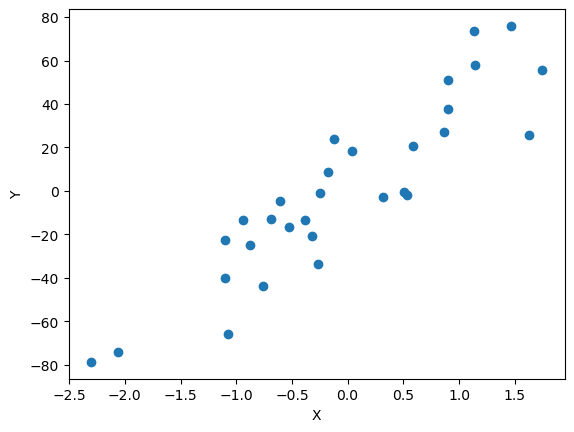

In [4]:
plt.scatter(X,Y)

plt.xlabel("X")
plt.ylabel("Y")

In [6]:
# Defining size of layer

def layer_size(X,Y):
    nx = X.shape[0]
    ny = Y.shape[0]
    
    return (nx,ny)

In [7]:
nx,ny = layer_size(X,Y)
print("nx" + str(nx))
print("ny" + str(ny))

nx1
ny1


In [30]:
# Defining parameter

def parameter(nx,ny):
    w = np.random.randn(ny,nx) * 0.01
    b = np.zeros((ny,1))
    
    param={
        "W":w,
        "b":b
    }
    return param
    

In [31]:
param = parameter(nx,ny)
print("W: " + str(param["W"]))
print("b: " + str(param["b"]))

W: [[0.0047182]]
b: [[0.]]


In [34]:
# Forward Propagation

def Prop_forward(param,X):
    w = param["W"]
    b = param["b"]
    
    z = np.dot(w,X) + b
    
    y = z
    
    return y

In [35]:
y_hat = Prop_forward(param,X)
print(y_hat)

[[ 0.00150529 -0.00506248  0.00408317 -0.00081355  0.00540104  0.00237087
  -0.01085912 -0.00322597 -0.00181205 -0.00414191 -0.00972016 -0.00519294
  -0.00518951  0.00534935  0.00823237 -0.00057982 -0.00441515  0.00766399
   0.00689852  0.00425389 -0.00359153  0.00250232 -0.00249202 -0.00126395
   0.00274984  0.00019917  0.00425042 -0.00117658 -0.00288639 -0.00152123]]


In [36]:
# Compute Cost

def Cost(y_hat,Y):
    m = Y.shape[1]
    cost = np.sum((y_hat-Y)**2)/(2*m)
    
    return cost

In [37]:
print("The cost is: " + str(Cost(y_hat,Y)))

The cost is: 790.6976434014426


# Neural Network Model #

In [43]:
def nn_model(X,Y, numIteration = 10, print_cost=False):
    nx = layer_size(X,Y)[0]
    ny = layer_size(X,Y)[1]
    
    param = parameter(nx,ny)
    
    for i in range(0,numIteration):
        y_hat = np.dot(param["W"],X) + param["b"]
        
        cost = np.sum((y_hat - Y)**2)/(2*Y.shape[1])
        parameters  = w3_tools.train_nn(param,y_hat,X,Y)
        if print_cost:
            print('Cost after iteration %i: %f' %(i,cost))
    
    
    return parameters

In [44]:
parameters = nn_model(X, Y, numIteration =15, print_cost=True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

Cost after iteration 0: 790.218941
Cost after iteration 1: 790.218941
Cost after iteration 2: 790.218941
Cost after iteration 3: 790.218941
Cost after iteration 4: 790.218941
Cost after iteration 5: 790.218941
Cost after iteration 6: 790.218941
Cost after iteration 7: 790.218941
Cost after iteration 8: 790.218941
Cost after iteration 9: 790.218941
Cost after iteration 10: 790.218941
Cost after iteration 11: 790.218941
Cost after iteration 12: 790.218941
Cost after iteration 13: 790.218941
Cost after iteration 14: 790.218941
W = [[43.63366703]]
b = [[0.17926448]]


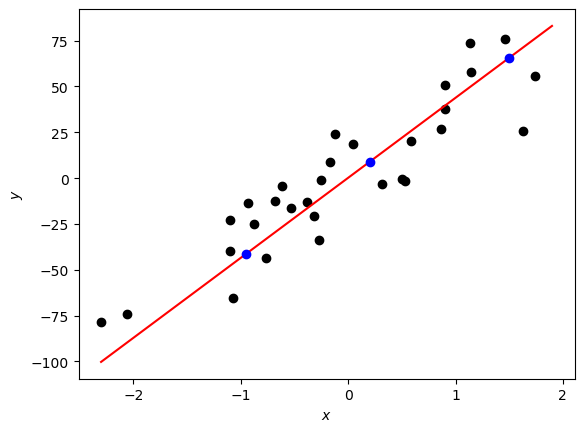

In [45]:
X_pred = np.array([-0.95, 0.2, 1.5])

fig, ax = plt.subplots()
plt.scatter(X, Y, color = "black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(X[0,:]),np.max(X[0,:])*1.1, 0.1)
ax.plot(X_line, W_simple[0,0] * X_line + b_simple[0,0], "r")
ax.plot(X_pred, W_simple[0,0] * X_pred + b_simple[0,0], "bo")
plt.plot()
plt.show()